# Tugas Praktikum Minggu 10
### Nicholas Juan Kalvin P. | 162012133068
<hr>



# Image Mining

## Tugas Praktikum:
<ol>
    <li> Gunakan dataset fashion mnist dari library keras dan berikan penjelasan mengenai dataset tersebut. </li>
    <li> Lakukan  transformasi  fitur  dengan  menggunakan  PCA  dan  berikan  alasan  pemilihan jumlah komponen PCA. </li>
    <li>Bandingkan citra asli dengan citra yang sudah ditransformasi dengan menggunakan PCA, apakah berbeda? Mengapa?</li>
    <li>Lakukan clustering dari dataset citra yang sudah mengalami transformasi dengan PCA.</li>
    <li>Lakukan analisis dan interpretasi dari hasil clustering dan berikan juga penjelasan untuk tiap cluster (jumlah anggota tiap cluster, karakteristik tiap cluster, dll)</li>
    <li>Dokumentasikan  setiap  langkah  dan  berikan  keterangan  untuk  setiap  langkah  yang dilakukan</li>
    <li>Kumpulkan dalam format .ipynb atau jika tidak memungkinkan kumpulkan dalam format pdf. Format penamaan file: NAMA_NIM_IMAGECLUSTERING</li>
</ol>

<hr>


## Requirements

In [69]:
# Module imports
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


<hr>

## Step 1: Fashion MNIST Dataset

<p>Dataset Fashion MNIST adalah salah satu dataset dari database MNIST <i>(Modified National Insititute of Standards and Technology)</i> yang biasanya menjadi basis data untuk data latihan model kecerdasan buatan dengan ciri-ciri ukuran 28x28, <i>grey-scaled</i>, dan <i>anti-aliased</i>.</p><br><br>Fashion MNIST, adalah dataset yang mirip seperti digit MNIST, dengan perbedaan gambar berupa pakaian-pakaian bergeometri simpel, belum bewarna hitam=putih dan dengan ukuran gambar 28x28 yang sama.

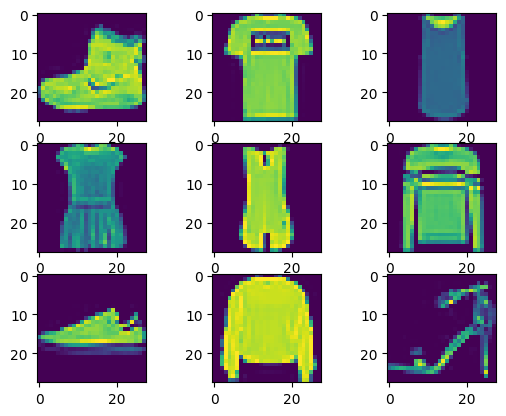

In [58]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()


for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i])
plt.show()

<hr>

## Step 2: Image Feature Extraction

<p><i>Feature extraction</i> adalah suatu metode untuk membuat gambar dapat dibaca oleh mesin dengan cara mentransformasi bentukan gamnbar menjadi matriks dimana satu sel melambangkan satu piksel. Matriks yang berisi informasi gambar di pixel, lalu di proses lebih lanjut dan sedemikian rupa agar pola dapat ditemukan yang membolehkan mesin untuk melakukan perhitungan lebih lanjut. </p>

<p>Fitur-fitur dari gambar antara lain:

<ol>
    <li> Contoh fitur alami:
        <ul>
            <li>Kecerahan</li>
            <li>Tepi</li>
        </ul>    
    </li>
    <li> Contoh fitur buatan:
        <ul>
            <li>Histogram</li>
            <li>Graylevel</li>
        </ul>    
    </li>

Bentuk citra (28, 28) dengan ukuran (W x H): 784
Hanya terdapat satu channel
Ukuran fitur channel (Vektor fitur): (1, 784)
Ukuran fitur binary (Threshold):  (1, 784)


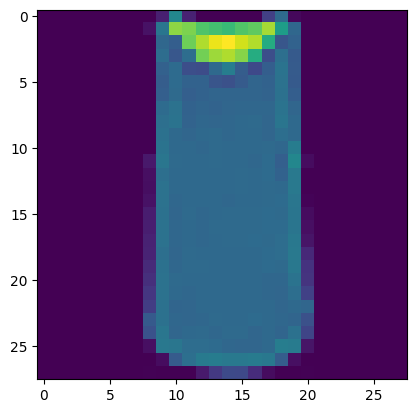

In [59]:
# Fitur-fitur dangkal gambar
citra = train_X[2]
plt.imshow(citra)
print("Bentuk citra", citra.shape, "dengan ukuran (W x H):", citra.size)
print("Hanya terdapat satu channel")
print("Ukuran fitur channel (Vektor fitur):", citra.reshape(1, -1).shape)
(treshold, img_bin) = cv2.threshold(citra, 127, 255, cv2.THRESH_BINARY)
print("Ukuran fitur binary (Threshold): ", (img_bin.reshape(1, -1).shape))

<p>Karena citra hanya memiliki satu channel warna, konversi ke RGB ataupun HSV akan gagal.
</p><br><br><p>Pembuatan histogram pun hanya dilakukan untuk satu channel warna tersebut.</p>

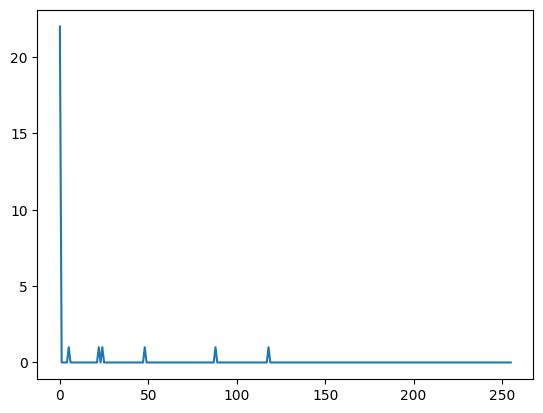

In [60]:
hist_citra = cv2.calcHist(citra, [0], None, [256], [0, 256])
plt.plot(hist_citra)

### PCA

<p>PCA diaplikasikan kepada array X (data training berisi gambar-gambar dengan ukuran [0, 768] x 60000 gambar) untuk mengurangi dimensi dari semua gambar </p>

#### PCA 1. Standardization

In [91]:

# Standardisasi : Mengubah mean X menjadi 0 dan varian menjadi 1
X = train_X.reshape(-1, train_X.shape[1]*train_X.shape[2])
X_scaling = StandardScaler().fit_transform(X)
print("Ukuran data train", train_X.shape)
print("Ukuran data train (fitur)", X.shape)
print("Ukuran data train (standardisasi):", X_scaling.shape)

Ukuran data train (60000, 28, 28)
Ukuran data train (fitur) (60000, 784)
Ukuran data train (standardisasi): (60000, 784)


#### PCA 2. Transformation

In [81]:
# PCA untuk visualisasi, jumlah komponen terbaik yang digunakan untuk visualisasi adalah 2 atau 3 untuk 3D
komponen = 2


pca = PCA(komponen)
projected = pca.fit_transform(X_scaling)
print(projected.shape)

(60000, 2)


#### PCA 3. Visualization

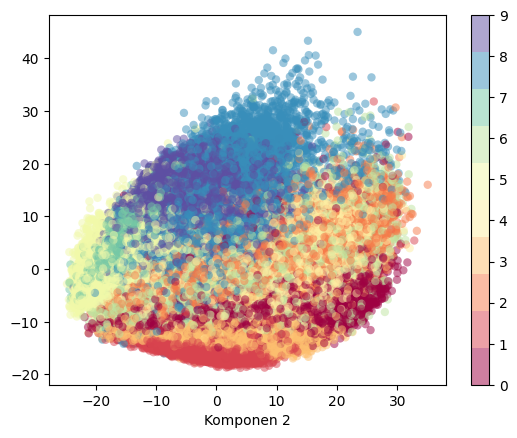

In [87]:
plt.scatter(projected[:,0], projected[:,1], c=train_y, edgecolor="none", alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Komponen 1')
plt.xlabel('Komponen 2')
plt.colorbar()
plt.show()